### Preprocesing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('hotel_bookings_data.csv',sep=",")
df = data.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
# Pengelompokan kolom berdasarkan jenisnya: kategorikal & numerik
nums = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 
        'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
        'children','babies','is_repeated_guest','previous_cancellations',
        'previous_bookings_not_canceled','booking_changes','agent','company',
        'days_in_waiting_list','adr','required_car_parking_spaces',
        'total_of_special_requests']
cats = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment','distribution_channel',
        'deposit_type','customer_type','reservation_status']

In [4]:
# Ringkasan statistik dari kolom numerikal
df[nums].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# Ringkasan statistik dari kolom kategorikal
df[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [6]:
# Melihat kolom-kolom yang masih mempunyai missing values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

missing values decision making:
* We can fill in the `Children` column with the number 0 describing the absence of children in the hotel booking data
* We can fill in the `city` column with "unknown" because the country of origin of the hotel booker is unknown
* `agent` & `company` \: impute with a value of 0 because the minimum values are 1 and 6, also avoiding wrong assumptions

In [7]:
# null Values
df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

Replace the value that does not match.
* because in the `meal` column, the Undefined line has the same meaning as No Meal so it is combined

In [8]:
# Mengubah Undefined menjadi no meal
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

* Delete unnecessary data
* Create total guest data, namely the number of adults, children, and babies
* delete data that has 0 guests

In [9]:
df["guest"] = df["adults"]+df["children"]+df["babies"]
print("Data with 0 guest: {0} out of {1} all data".format(df[df["guest"] == 0].shape[0], df.shape[0]))
df_preprocessing = df[df["guest"] > 0].copy()
df_preprocessing.shape

Data with 0 guest: 180 out of 119390 all data


(119210, 30)

# Analysis of the Monthly Number of Hotel Bookings by Hotel Type

In [10]:
df['arrival_date_year'].unique()

array([2017, 2018, 2019], dtype=int64)

In [11]:
# Melakukan copy pada data hasil pre-processing
df1 = df_preprocessing.copy()

# Membuat data agregasi untuk menghitung jumlah pemesanan hotel per bulan berdasarkan tipe hotel
df1_gr = df1.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1_gr.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # mengubah nama kolom tabel
df1_gr

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


In [12]:
# normalisasi untuk mendapatkan jumlah rata-rata pemesanan di suatu bulan pada tahun yang berbeda
df1_gr['average_num_booking'] = round(df1_gr['num_booking']/df1_gr['unique_year'])
df1_gr.head()

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0


In [13]:
# Mengurutkan data berdasarkan bulan, serta membuat singkatan Bulan agar lebih mudah divisualisasi
ordered_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df1_gr["month"] = df1_gr["arrival_month"].str[:3] # mengambil 3 huruf terdepan dari setiap bulan
df1_gr["month"] = pd.Categorical(df1_gr["month"], categories=ordered_months, ordered=True) # mengurutkan bulan

df1_gr.head()

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan


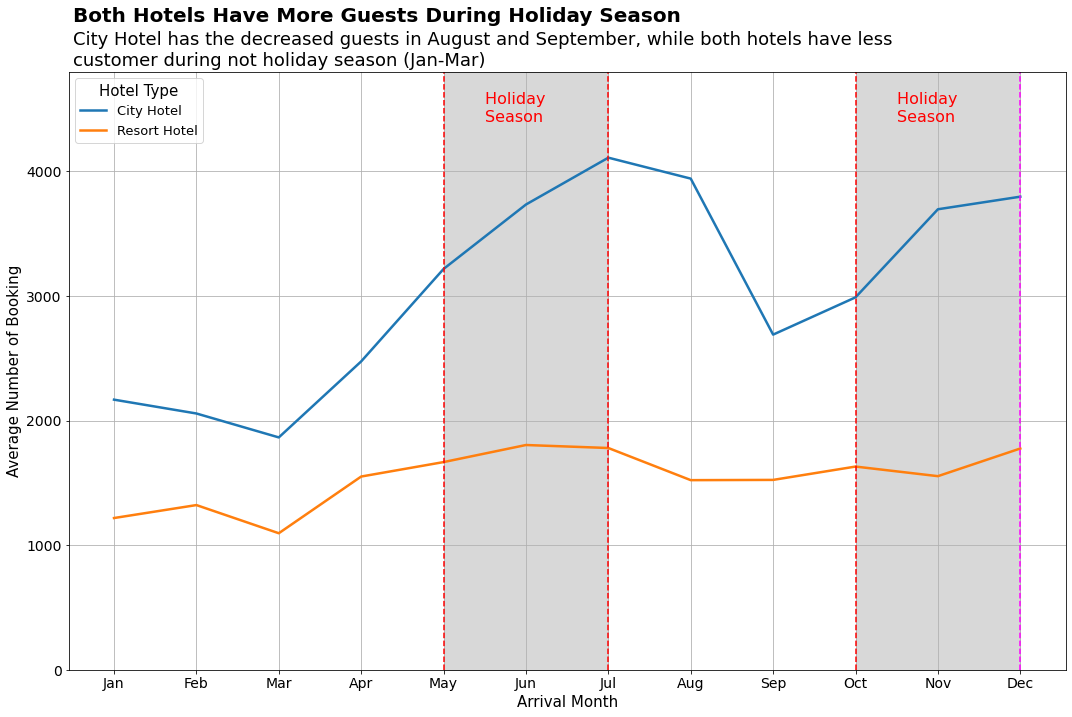

In [77]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.lineplot(x='month', y='average_num_booking', hue='hotel_type', color= 'gray',
             size="hotel_type", sizes=(2.5, 2.5), data=df1_gr) # plot awal menggunakan lineplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Arrival Month', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Average Number of Booking', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 4800) # membatasi y axis

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='grey', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='magenta') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='grey', alpha=0.3) # memberikan blok warna pada

plt.text(x=-0.5, y=5200, s="Both Hotels Have More Guests During Holiday Season", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=4850, s="City Hotel has the decreased guests in August and September, while both hotels have less \ncustomer during not holiday season (Jan-Mar)", 
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong

# Analysis of the Effects of Time Change on Hotel Booking Cancellation

<AxesSubplot:xlabel='total_nights', ylabel='Count'>

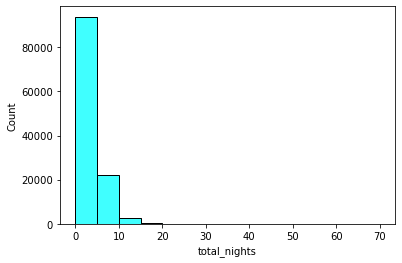

In [26]:
# Melakukan copy pada data hasil pre-processing
df2 = df_preprocessing.copy()

# Melakukan agregasi data untuk mendapatkan durasi menginap berdasarkan jenis hotel
df2["total_nights"] = df2["stays_in_weekend_nights"] + df2["stays_in_weekdays_nights"] # mencari total malam yang dipesan

sns.histplot(data=df2, x="total_nights", binwidth=5, color="Cyan")

Based on the histogram above, the data distribution appears to be right-skewed. As a result, grouping is done to equal out the distribution. The grouping was carried out for a total of three weeks, then from the fifteenth to the twenty-first night (15-21). Furthermore, for cumulative nights in excess of three weeks (>21)

In [17]:
# pengelompokkan data berdasarkan hasil pengamatan distribusi data
df2['total_nights_group'] = np.where(df2['total_nights'] > 21, 21, 
                                       np.where(df2['total_nights'] > 14, 15, df2['total_nights']))

# membuat tabel agregat
df2_gr = df2.groupby(['hotel', 'is_canceled', 'total_nights_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df2_pivot = df2_gr.pivot_table(index=['hotel', 'total_nights_group'], columns='is_canceled', values='num_bookings').reset_index()
df2_pivot['pct_canceled'] = round(df2_pivot[1]*100.0/(df2_pivot[0]+df2_pivot[1]), 2)

df2_pivot.head(100)

is_canceled,hotel,total_nights_group,0,1,pct_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


The purpose of the plot i want to show is to compare two types of hotels based on the length of the customer's stay, however a bar chart is used to observe the cancellation rate of hotel reservations. We'll also look at how the duration of stay impacts the cancellation rate of hotel bookings, so that patterns in that data may be illustrated.

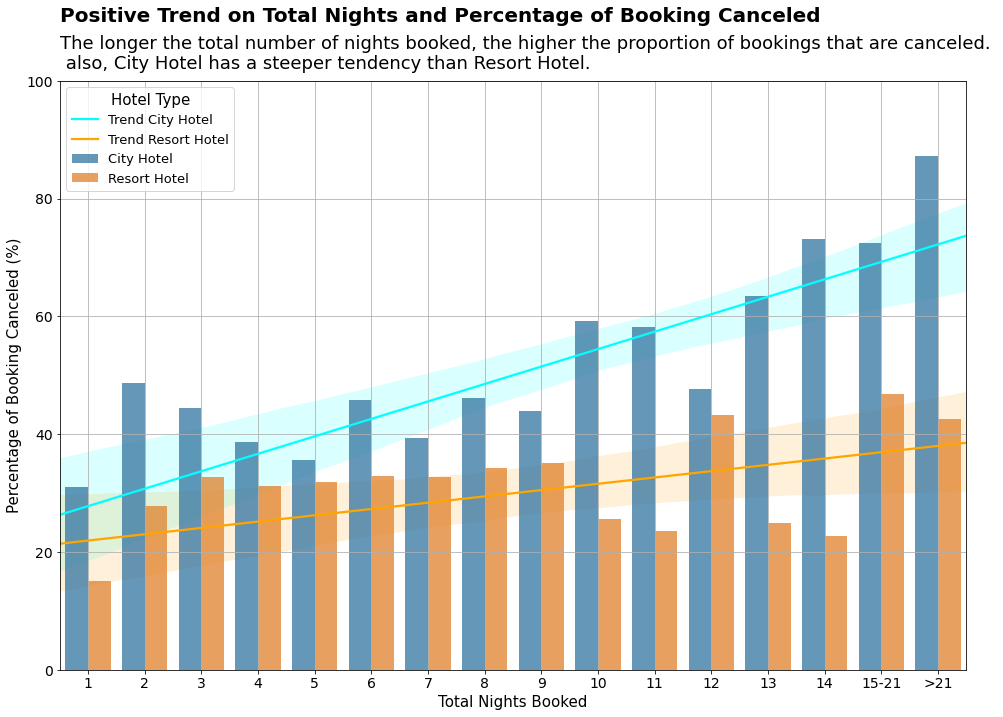

In [71]:
plt.figure(figsize=(15,10))
sns.regplot(x='total_nights_group', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel',color='cyan')
sns.regplot(x='total_nights_group', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel',color='orange')
sns.barplot(x='total_nights_group', y='pct_canceled', hue='hotel', data=df2_pivot, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) # mengatur customized-label pada x-axis
plt.xlabel('Total Nights Booked', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 100) # membatasi y axis
plt.xlim(0.5, 16.5) # membatasi x axis

plt.text(x=0.5, y=110, s="Positive Trend on Total Nights and Percentage of Booking Canceled", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=0.5, y=102, s="The longer the total number of nights booked, the higher the proportion of bookings that are canceled. \n also, City Hotel has a steeper tendency than Resort Hotel.",
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong

# Analysis of the Booking Effect Timeline on Hotel Booking Cancellation Rate

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

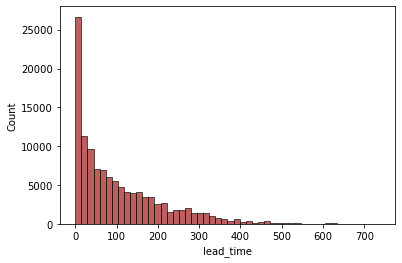

In [27]:
# Melakukan copy pada data hasil pre-processing
df3 = df_preprocessing.copy() 

sns.histplot(data=df2, x="lead_time", bins=50, color="Brown")

In [20]:
# Mengkategorisasi kolom lead_time agar lebih sederhana
df3['lead_times'] = np.where(df3['lead_time'] > 400, 401, df3['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(df3['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df3['lead_time_group'] = pd.cut(df3['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

In [21]:
# melakukan agregasi data untuk menghitung jumlah pemesanan berdasarkan group lead_time yang sudah dibuat dan berdasarkan tipe hotel
df3_book = df3.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df3_pivot = df3_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df3_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df3_pivot['all_bookings'] = df3_pivot['not_canceled']+df3_pivot['canceled']
df3_pivot['pct_canceled'] = df3_pivot['canceled']*100.0/(df3_pivot['all_bookings']) 

df3_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5184,23244,22.302530
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274


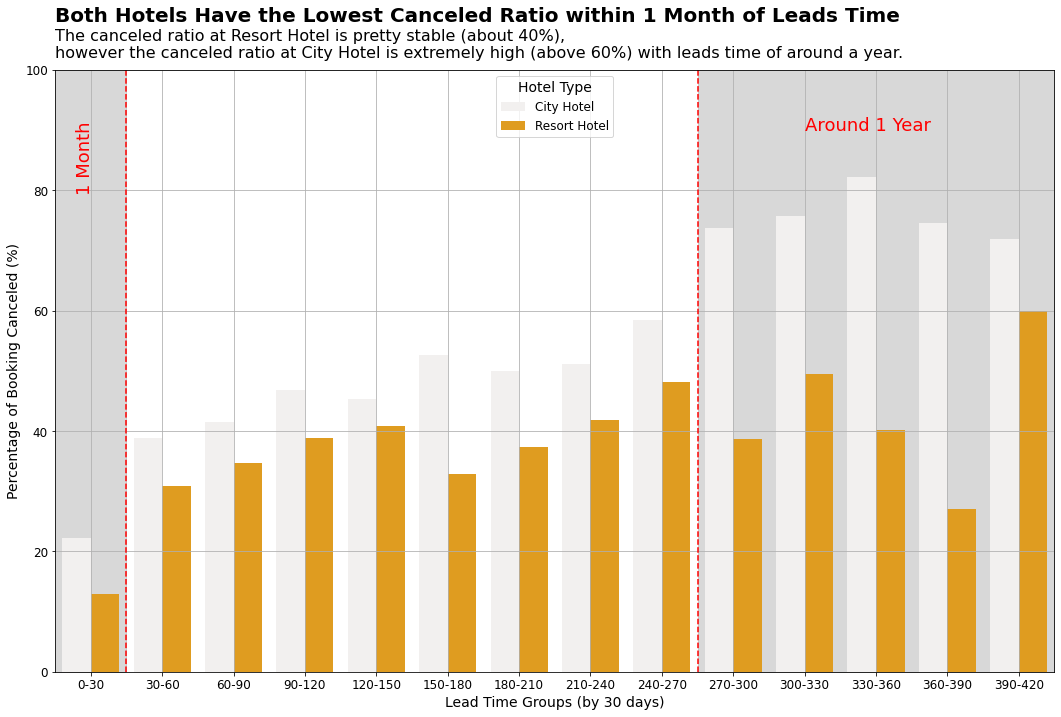

In [61]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', color='orange' , data=df3_pivot) # plot awal menggunakan barplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=12) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) # mengatur title pada y-axis 
plt.ylim(0, 100) # membatasi y-axis
plt.xlim(-0.5,13.5) # membatasi x-axis

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='Gray', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(8.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='gray', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=108, s="Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="The canceled ratio at Resort Hotel is pretty stable (about 40%), \nhowever the canceled ratio at City Hotel is extremely high (above 60%) with leads time of around a year.",
         fontsize=16) # memberikan keterangan tambahan atas judul
 
plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
